In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27321 entries, 0 to 27320
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          27321 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     27321 non-null  int64  
 3   COUNTYID                     27321 non-null  int64  
 4   STATEID                      27321 non-null  int64  
 5   state                        27321 non-null  object 
 6   state_ab                     27321 non-null  object 
 7   city                         27321 non-null  object 
 8   place                        27321 non-null  object 
 9   type                         27321 non-null  object 
 10  primary                      27321 non-null  object 
 11  zip_code                     27321 non-null  int64  
 12  area_code                    27321 non-null  int64  
 13  lat             

In [4]:
train.head()

UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID        state state_ab  \
0  267822      NaN       140        53       36     New York       NY   
1  246444      NaN       140       141       18      Indiana       IN   
2  245683      NaN       140        63       18      Indiana       IN   
3  279653      NaN       140       127       72  Puerto Rico       PR   
4  247218      NaN       140       161       20       Kansas       KS   

         city           place   type  ... female_age_mean  female_age_median  \
0    Hamilton        Hamilton   City  ...        44.48629           45.33333   
1  South Bend        Roseland   City  ...        36.48391           37.58333   
2    Danville        Danville   City  ...        42.15810           42.83333   
3    San Juan        Guaynabo  Urban  ...        47.77526           50.58333   
4   Manhattan  Manhattan City   City  ...        24.17693           21.58333   

   female_age_stdev  female_age_sample_weight  female_age_samples  pct_own  \
0          22.51276                 685.33845              2618.0  0.79046   
1          23.43353                 267.23367              1284.0  0.52483   
2          23.94119                 707.01963              3238.0  0.85331   
3          24.32015                 362.20193              1559.0  0.65037   
4          11.10484                1854.48652              3051.0  0.13046   

   married  married_snp  separated  divorced  
0  0.57851      0.01882    0.01240   0.08770  
1  0.34886      0.01426    0.01426   0.09030  
2  0.64745      0.02830    0.01607   0.10657  
3  0.47257      0.02021    0.02021   0.10106  
4  0.12356      0.00000    0.00000   0.03109  

[5 rows x 80 columns]

In [5]:
train.shape

(27321, 80)

In [6]:
train.duplicated().sum()

160

In [7]:
train.drop_duplicates(inplace=True)

In [8]:
train.shape

(27161, 80)

In [9]:
train['UID'].nunique()

27161

TOTAL ROWS ARE 27161 AND TOTAL UNIQUE ENTRIES IN UID COLUMN IS ALSO 27161. SO WE ARE GOING TO SET UID COLUMN AS INDEX.

In [10]:
train = train.set_index('UID')

In [11]:
print(train.shape)
train.head()

(27161, 79)


BLOCKID  SUMLEVEL  COUNTYID  STATEID        state state_ab  \
UID                                                                  
267822      NaN       140        53       36     New York       NY   
246444      NaN       140       141       18      Indiana       IN   
245683      NaN       140        63       18      Indiana       IN   
279653      NaN       140       127       72  Puerto Rico       PR   
247218      NaN       140       161       20       Kansas       KS   

              city           place   type primary  ...  female_age_mean  \
UID                                                ...                    
267822    Hamilton        Hamilton   City   tract  ...         44.48629   
246444  South Bend        Roseland   City   tract  ...         36.48391   
245683    Danville        Danville   City   tract  ...         42.15810   
279653    San Juan        Guaynabo  Urban   tract  ...         47.77526   
247218   Manhattan  Manhattan City   City   tract  ...         24.17693   

        female_age_median  female_age_stdev  female_age_sample_weight  \
UID                                                                     
267822           45.33333          22.51276                 685.33845   
246444           37.58333          23.43353                 267.23367   
245683           42.83333          23.94119                 707.01963   
279653           50.58333          24.32015                 362.20193   
247218           21.58333          11.10484                1854.48652   

        female_age_samples  pct_own  married  married_snp  separated  divorced  
UID                                                                             
267822              2618.0  0.79046  0.57851      0.01882    0.01240   0.08770  
246444              1284.0  0.52483  0.34886      0.01426    0.01426   0.09030  
245683              3238.0  0.85331  0.64745      0.02830    0.01607   0.10657  
279653              1559.0  0.65037  0.47257      0.02021    0.02021   0.10106  
247218              3051.0  0.13046  0.12356      0.00000    0.00000   0.03109  

[5 rows x 79 columns]

In [12]:
train['BLOCKID'].nunique()

0

In [13]:
train['primary'].unique()

array(['tract'], dtype=object)

In [14]:
train['SUMLEVEL'].unique()

array([140])

In [15]:
train = train.drop(['BLOCKID','SUMLEVEL','primary'],axis=1)

DROPPING 'BLOCKID' COLUMN AS IT IS HAVING ALL NULL VALUES AND 'SUMLEVEL' as well as 'primary' COLUMN AS IT IS HAVING ONLY 1 ENTRY.

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27161 entries, 267822 to 265371
Data columns (total 76 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   COUNTYID                     27161 non-null  int64  
 1   STATEID                      27161 non-null  int64  
 2   state                        27161 non-null  object 
 3   state_ab                     27161 non-null  object 
 4   city                         27161 non-null  object 
 5   place                        27161 non-null  object 
 6   type                         27161 non-null  object 
 7   zip_code                     27161 non-null  int64  
 8   area_code                    27161 non-null  int64  
 9   lat                          27161 non-null  float64
 10  lng                          27161 non-null  float64
 11  ALand                        27161 non-null  float64
 12  AWater                       27161 non-null  int64  
 13  pop       

In [17]:
print(train.isnull().sum(axis=0))

COUNTYID         0
STATEID          0
state            0
state_ab         0
city             0
              ... 
pct_own        207
married        150
married_snp    150
separated      150
divorced       150
Length: 76, dtype: int64


In [18]:
train_na = train[train.isna().any(axis=1)]

In [19]:
print(train_na.shape)
train_na.head()

(576, 76)


COUNTYID  STATEID       state state_ab      city          place  type  \
UID                                                                             
223593        19        4     Arizona       AZ    Tucson     Littletown   CDP   
233040       101        8    Colorado       CO    Pueblo    Pueblo City  City   
263292        13       34  New Jersey       NJ    Newark    Silver Lake  City   
267158        47       36    New York       NY  Brooklyn  New York City  City   
292484        25       55   Wisconsin       WI   Madison   Madison City  City   

        zip_code  area_code        lat  ...  female_age_mean  \
UID                                     ...                    
223593     85734        520  32.067721  ...         40.02370   
233040     81001        719  38.308407  ...         20.00784   
263292      7107        973  40.773830  ...         35.47667   
267158     11215        718  40.659126  ...              NaN   
292484     53703        608  43.073403  ...         22.03226   

        female_age_median  female_age_stdev  female_age_sample_weight  \
UID                                                                     
223593           40.83333           8.49563                  30.01695   
233040           19.25000           4.30291                 172.56153   
263292           35.58333          20.62717                 369.61740   
267158                NaN               NaN                       NaN   
292484           21.08333           5.13435                1365.86300   

        female_age_samples  pct_own  married  married_snp  separated  divorced  
UID                                                                             
223593               161.0      NaN  0.16308      0.16308    0.02634   0.20499  
233040               309.0  0.00000  0.00000      0.00000    0.00000   0.00000  
263292              1671.0  0.24002  0.37411      0.05579    0.02504   0.07654  
267158                 NaN      NaN      NaN          NaN        NaN       NaN  
292484              1981.0  0.00000  0.00773      0.00000    0.00000   0.01160  

[5 rows x 76 columns]

In [20]:
null_data_percent = (train_na.shape[0]/train.shape[0])*100
null_data_percent

2.1206877508191893

WE HAVE CHECKED PERCENTAGE OF NULL DATA PRESENT IN OUR DATAFRAME WHICH COMES OUT TO BE 2.12%, WHICH IS VERY LOW. IF WE DROP THESE ROWS NOT MUCH INFORMATION IS LOST


In [21]:
train = train.dropna()

In [22]:
train.shape

(26585, 76)

In [23]:
df = train[train['pct_own']>0.1]
df.shape

(26215, 76)

In [24]:
df = df.sort_values(by='second_mortgage',ascending=False)

In [25]:
pd.set_option('display.max_columns', None)
df.head()

COUNTYID  STATEID          state state_ab         city  \
UID                                                              
289712       147       51       Virginia       VA    Farmville   
251185        27       25  Massachusetts       MA    Worcester   
269323        81       36       New York       NY       Corona   
251324         3       24       Maryland       MD  Glen Burnie   
235788        57       12        Florida       FL        Tampa   

                  place  type  zip_code  area_code        lat        lng  \
UID                                                                        
289712        Farmville  Town     23901        434  37.297357 -78.396452   
251185   Worcester City  City      1610        508  42.254262 -71.800347   
269323     Harbor Hills  City     11368        718  40.751809 -73.853582   
251324      Glen Burnie   CDP     21061        410  39.127273 -76.635265   
235788  Egypt Lake-leto  City     33614        813  28.029063 -82.495395   

            ALand  AWater   pop  male_pop  female_pop   rent_mean  \
UID                                                                 
289712   413391.0       0  1733       609        1124   782.00000   
251185   797165.0       0  2133      1139         994   942.32740   
269323   169666.0       0  4181      2249        1932  1413.12357   
251324  1110282.0       0  4866      1985        2881  1335.49818   
235788  2050906.0  234794  5468      2784        2684   914.10322   

        rent_median  rent_stdev  rent_sample_weight  rent_samples  rent_gt_10  \
UID                                                                             
289712        781.0    22.95830            11.00000          11.0     1.00000   
251185        953.0   304.34109           333.88019         645.0     0.98906   
269323       1388.0   499.47343           205.65925         777.0     1.00000   
251324       1335.0   336.92824           352.62444        1502.0     1.00000   
235788        880.0   191.64962          1067.77502        1847.0     0.96619   

        rent_gt_15  rent_gt_20  rent_gt_25  rent_gt_30  rent_gt_35  \
UID                                                                  
289712     1.00000     1.00000     1.00000     1.00000     1.00000   
251185     0.97813     0.86250     0.81563     0.68438     0.53281   
269323     0.92664     0.80952     0.69241     0.58301     0.44659   
251324     0.91545     0.77763     0.60186     0.49001     0.42011   
235788     0.92794     0.80820     0.58925     0.44235     0.37140   

        rent_gt_40  rent_gt_50  universe_samples  used_samples      hi_mean  \
UID                                                                           
289712     1.00000     0.00000                11            11  33088.92156   
251185     0.47500     0.39063               655           640  39036.18368   
269323     0.37967     0.30245               821           777  56434.63436   
251324     0.38016     0.23435              1502          1502  59466.62302   
235788     0.22783     0.17350              1965          1804  48495.17313   

        hi_median     hi_stdev  hi_sample_weight  hi_samples  family_mean  \
UID                                                                         
289712    23236.0  19970.41249          16.33316        19.0  47067.92731   
251185    29037.0  42317.65457         599.87224       768.0  50471.95789   
269323    46106.0  47279.53535         674.74625       997.0  48558.91165   
251324    50164.0  37351.26266        1293.31194      2068.0  64899.68626   
235788    38340.0  41137.53473        1664.02791      2179.0  52332.06236   

        family_median  family_stdev  family_sample_weight  family_samples  \
UID                                                                         
289712        59954.0   24030.19608               5.33316             8.0   
251185        40476.0   45794.28515             314.09134           432.0   
269323        40462.0   35569.90113             630.41529          

In [26]:
top_2500_second_mortgage_pctown_10 = df.head(2500)
top_2500_second_mortgage_pctown_10

COUNTYID  STATEID          state state_ab          city  \
UID                                                               
289712       147       51       Virginia       VA     Farmville   
251185        27       25  Massachusetts       MA     Worcester   
269323        81       36       New York       NY        Corona   
251324         3       24       Maryland       MD   Glen Burnie   
235788        57       12        Florida       FL         Tampa   
...          ...      ...            ...      ...           ...   
230480        77        6     California       CA       Manteca   
236853        86       12        Florida       FL    Cutler Bay   
287458       439       48          Texas       TX        Keller   
271050        17       39           Ohio       OH    Middletown   
262770         1       34     New Jersey       NJ  Mays Landing   

                  place     type  zip_code  area_code        lat         lng  \
UID                                                                            
289712        Farmville     Town     23901        434  37.297357  -78.396452   
251185   Worcester City     City      1610        508  42.254262  -71.800347   
269323     Harbor Hills     City     11368        718  40.751809  -73.853582   
251324      Glen Burnie      CDP     21061        410  39.127273  -76.635265   
235788  Egypt Lake-leto     City     33614        813  28.029063  -82.495395   
...                 ...      ...       ...        ...        ...         ...   
230480     Manteca City     City     95336        209  37.732143 -121.242902   
236853       Cutler Bay     City     33189        305  25.550391  -80.347791   
287458      Keller City     Town     76248        817  32.913822  -97.204310   
271050      Jacksonburg  Village     45042        513  39.556756  -84.443252   
262770     Mays Landing     City      8330        609  39.432879  -74.686137   

             ALand   AWater    pop  male_pop  female_pop   rent_mean  \
UID                                                                    
289712    413391.0        0   1733       609        1124   782.00000   
251185    797165.0        0   2133      1139         994   942.32740   
269323    169666.0        0   4181      2249        1932  1413.12357   
251324   1110282.0        0   4866      1985        2881  1335.49818   
235788   2050906.0   234794   5468      2784        2684   914.10322   
...            ...      ...    ...       ...         ...         ...   
230480  99716769.0  1333851   6158      3063        3095  1301.87928   
236853   5973763.0   303353   6082      2846        3236  1171.16929   
287458   5402229.0    39076   6055      2948        3107  3568.54429   
271050  57770725.0   320075   4624      2242        2382  1034.18493   
262770  35788759.0   941328  10140      4931        5209  1388.74715   

        rent_median  rent_stdev  rent_sample_weight  rent_samples  rent_gt_10  \
UID                                                                             
289712        781.0    22.95830            11.00000          11.0     1.00000   
251185        953.0   304.34109           333.88019         645.0     0.98906   
269323       1388.0   499.47343           205.65925         777.0     1.00000   
251324       1335.0   336.92824           352.62444        1502.0     1.00000   
235788        880.0   191.64962          1067.77502        1847.0     0.96619   
...             ...         ...                 ...           ...         ...   
230480       1260.0   607.57824           182.65634         412.0     0.94802   
236853       1143.0   467.51572           309.85627        1014.0     0.98108   
287458       3791.0   612.08579             1.47118          24.0     1.00000   
271050        918.0   429.00225            57.24333         100.0     1.00000   
262770       1268.0   568.73713           256.56181        1010.0     1.00000   

        rent_gt_15  rent_gt_20  rent_gt_25  rent_gt_30  rent_gt_35  \
UID                               

First getting data which has pct >0.1 then sorting it in descending order by second mortgage and filtering out top 2500.

In [27]:
import plotly.express as px
import plotly.graph_objects as go

In [28]:
fig = go.Figure(data=go.Scattergeo(
    lat = top_2500_second_mortgage_pctown_10['lat'],
    lon = top_2500_second_mortgage_pctown_10['lng']),
    )
fig.update_layout(
    geo=dict(
        scope = 'north america',
        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        projection = dict(
            type = 'conic conformal',
            rotation_lon = -100
        ),
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ -140.0, -55.0 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ 20.0, 60.0 ],
            dtick = 5
        )
    ),
    title='Top 2,500 locations with second mortgage is the highest and percent ownership is above 10 percent')
fig.show()

In [29]:
train['bad_debt'] = train['second_mortgage'] + train['home_equity'] - train['home_equity_second_mortgage']

In [30]:
train.head()

COUNTYID  STATEID        state state_ab        city           place  \
UID                                                                           
267822        53       36     New York       NY    Hamilton        Hamilton   
246444       141       18      Indiana       IN  South Bend        Roseland   
245683        63       18      Indiana       IN    Danville        Danville   
279653       127       72  Puerto Rico       PR    San Juan        Guaynabo   
247218       161       20       Kansas       KS   Manhattan  Manhattan City   

         type  zip_code  area_code        lat        lng        ALand  \
UID                                                                     
267822   City     13346        315  42.840812 -75.501524  202183361.0   
246444   City     46616        574  41.701441 -86.266614    1560828.0   
245683   City     46122        317  39.792202 -86.515246   69561595.0   
279653  Urban       927        787  18.396103 -66.104169    1105793.0   
247218   City     66502        785  39.195573 -96.569366    2554403.0   

         AWater   pop  male_pop  female_pop  rent_mean  rent_median  \
UID                                                                   
267822  1699120  5230      2612        2618  769.38638        784.0   
246444   100363  2633      1349        1284  804.87924        848.0   
245683   284193  6881      3643        3238  742.77365        703.0   
279653        0  2700      1141        1559  803.42018        782.0   
247218        0  5637      2586        3051  938.56493        881.0   

        rent_stdev  rent_sample_weight  rent_samples  rent_gt_10  rent_gt_15  \
UID                                                                            
267822   232.63967           272.34441         362.0     0.86761     0.79155   
246444   253.46747           312.58622         513.0     0.97410     0.93227   
245683   323.39011           291.85520         378.0     0.95238     0.88624   
279653   297.39258           259.30316         368.0     0.94693     0.87151   
247218   392.44096          1005.42886        1704.0     0.99286     0.98247   

        rent_gt_20  rent_gt_25  rent_gt_30  rent_gt_35  rent_gt_40  \
UID                                                                  
267822     0.59155     0.45634     0.42817     0.18592     0.15493   
246444     0.69920     0.69920     0.55179     0.41235     0.39044   
245683     0.79630     0.66667     0.39153     0.39153     0.28307   
279653     0.69832     0.61732     0.51397     0.46927     0.35754   
247218     0.91688     0.84740     0.78247     0.60974     0.55455   

        rent_gt_50  universe_samples  used_samples      hi_mean  hi_median  \
UID                                                                          
267822     0.12958               387           355  63125.28406    48120.0   
246444     0.27888               542           502  41931.92593    35186.0   
245683     0.15873               459           378  84942.68317    74964.0   
279653     0.32961               438           358  48733.67116    37845.0   
247218     0.44416              1725          1540  31834.15466    22497.0   

           hi_stdev  hi_sample_weight  hi_samples  family_mean  family_median  \
UID                                                                             
267822  49042.01206        1290.96240      2024.0  67994.14790        53245.0   
246444  31639.50203         838.74664      1127.0  50670.10337        43023.0   
245683  56811.62186        1155.20980      2488.0  95262.51431        85395.0   
279653  45100.54010         928.32193      1267.0  56401.68133        44399.0   
247218  34046.50907        1548.67477      1983.0  54053.42396        50272.0   

        family_stdev  family_sample_weight  family_samples  hc_mortgage_mean  \
UID                                                                            
267822   47667.30119             884.33516          1491.0        1414.80295   
246444   34715.57548             375.

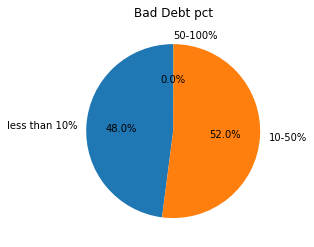

In [31]:
train['bins_bad_debt'] = pd.cut(train['bad_debt'],bins=[0,0.1,.5,1], labels=["less than 10%","10-50%","50-100%"])
train.groupby(['bins_bad_debt']).size().plot(kind='pie',subplots=True,startangle=90, autopct='%1.1f%%')
plt.title('Bad Debt pct')
plt.ylabel("")

plt.show()

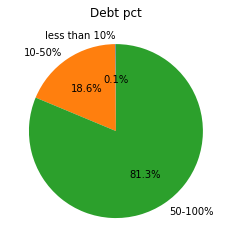

In [32]:
train['bins_debt'] = pd.cut(train['debt'],bins=[0,0.1,.5,1], labels=["less than 10%","10-50%","50-100%"])
train.groupby(['bins_debt']).size().plot(kind='pie',subplots=True,startangle=90, autopct='%1.1f%%')
plt.title('Debt pct')
plt.ylabel("")

plt.show()

In [33]:
train.head()

COUNTYID  STATEID        state state_ab        city           place  \
UID                                                                           
267822        53       36     New York       NY    Hamilton        Hamilton   
246444       141       18      Indiana       IN  South Bend        Roseland   
245683        63       18      Indiana       IN    Danville        Danville   
279653       127       72  Puerto Rico       PR    San Juan        Guaynabo   
247218       161       20       Kansas       KS   Manhattan  Manhattan City   

         type  zip_code  area_code        lat        lng        ALand  \
UID                                                                     
267822   City     13346        315  42.840812 -75.501524  202183361.0   
246444   City     46616        574  41.701441 -86.266614    1560828.0   
245683   City     46122        317  39.792202 -86.515246   69561595.0   
279653  Urban       927        787  18.396103 -66.104169    1105793.0   
247218   City     66502        785  39.195573 -96.569366    2554403.0   

         AWater   pop  male_pop  female_pop  rent_mean  rent_median  \
UID                                                                   
267822  1699120  5230      2612        2618  769.38638        784.0   
246444   100363  2633      1349        1284  804.87924        848.0   
245683   284193  6881      3643        3238  742.77365        703.0   
279653        0  2700      1141        1559  803.42018        782.0   
247218        0  5637      2586        3051  938.56493        881.0   

        rent_stdev  rent_sample_weight  rent_samples  rent_gt_10  rent_gt_15  \
UID                                                                            
267822   232.63967           272.34441         362.0     0.86761     0.79155   
246444   253.46747           312.58622         513.0     0.97410     0.93227   
245683   323.39011           291.85520         378.0     0.95238     0.88624   
279653   297.39258           259.30316         368.0     0.94693     0.87151   
247218   392.44096          1005.42886        1704.0     0.99286     0.98247   

        rent_gt_20  rent_gt_25  rent_gt_30  rent_gt_35  rent_gt_40  \
UID                                                                  
267822     0.59155     0.45634     0.42817     0.18592     0.15493   
246444     0.69920     0.69920     0.55179     0.41235     0.39044   
245683     0.79630     0.66667     0.39153     0.39153     0.28307   
279653     0.69832     0.61732     0.51397     0.46927     0.35754   
247218     0.91688     0.84740     0.78247     0.60974     0.55455   

        rent_gt_50  universe_samples  used_samples      hi_mean  hi_median  \
UID                                                                          
267822     0.12958               387           355  63125.28406    48120.0   
246444     0.27888               542           502  41931.92593    35186.0   
245683     0.15873               459           378  84942.68317    74964.0   
279653     0.32961               438           358  48733.67116    37845.0   
247218     0.44416              1725          1540  31834.15466    22497.0   

           hi_stdev  hi_sample_weight  hi_samples  family_mean  family_median  \
UID                                                                             
267822  49042.01206        1290.96240      2024.0  67994.14790        53245.0   
246444  31639.50203         838.74664      1127.0  50670.10337        43023.0   
245683  56811.62186        1155.20980      2488.0  95262.51431        85395.0   
279653  45100.54010         928.32193      1267.0  56401.68133        44399.0   
247218  34046.50907        1548.67477      1983.0  54053.42396        50272.0   

        family_stdev  family_sample_weight  family_samples  hc_mortgage_mean  \
UID                                                                            
267822   47667.30119             884.33516          1491.0        1414.80295   
246444   34715.57548             375.

In [34]:
city_list = train['city'].value_counts()
city_list

Chicago            286
Brooklyn           261
Los Angeles        219
Houston            213
Philadelphia       160
                  ... 
Fort Atkinson        1
Kirksville           1
Calera               1
Mc Connelsville      1
Richton Park         1
Name: city, Length: 6876, dtype: int64

In [35]:
city_list_10 = city_list[0:10]
city_list_10

Chicago         286
Brooklyn        261
Los Angeles     219
Houston         213
Philadelphia    160
San Antonio     138
Baltimore       128
Las Vegas       123
Phoenix         114
Miami           105
Name: city, dtype: int64

In [36]:
city_list_10.index

Index(['Chicago', 'Brooklyn', 'Los Angeles', 'Houston', 'Philadelphia',
       'San Antonio', 'Baltimore', 'Las Vegas', 'Phoenix', 'Miami'],
      dtype='object')

In [37]:
train['good_debt'] = 1 - train['bad_debt']
print(train.shape)
train.head()

(26585, 80)


COUNTYID  STATEID        state state_ab        city           place  \
UID                                                                           
267822        53       36     New York       NY    Hamilton        Hamilton   
246444       141       18      Indiana       IN  South Bend        Roseland   
245683        63       18      Indiana       IN    Danville        Danville   
279653       127       72  Puerto Rico       PR    San Juan        Guaynabo   
247218       161       20       Kansas       KS   Manhattan  Manhattan City   

         type  zip_code  area_code        lat        lng        ALand  \
UID                                                                     
267822   City     13346        315  42.840812 -75.501524  202183361.0   
246444   City     46616        574  41.701441 -86.266614    1560828.0   
245683   City     46122        317  39.792202 -86.515246   69561595.0   
279653  Urban       927        787  18.396103 -66.104169    1105793.0   
247218   City     66502        785  39.195573 -96.569366    2554403.0   

         AWater   pop  male_pop  female_pop  rent_mean  rent_median  \
UID                                                                   
267822  1699120  5230      2612        2618  769.38638        784.0   
246444   100363  2633      1349        1284  804.87924        848.0   
245683   284193  6881      3643        3238  742.77365        703.0   
279653        0  2700      1141        1559  803.42018        782.0   
247218        0  5637      2586        3051  938.56493        881.0   

        rent_stdev  rent_sample_weight  rent_samples  rent_gt_10  rent_gt_15  \
UID                                                                            
267822   232.63967           272.34441         362.0     0.86761     0.79155   
246444   253.46747           312.58622         513.0     0.97410     0.93227   
245683   323.39011           291.85520         378.0     0.95238     0.88624   
279653   297.39258           259.30316         368.0     0.94693     0.87151   
247218   392.44096          1005.42886        1704.0     0.99286     0.98247   

        rent_gt_20  rent_gt_25  rent_gt_30  rent_gt_35  rent_gt_40  \
UID                                                                  
267822     0.59155     0.45634     0.42817     0.18592     0.15493   
246444     0.69920     0.69920     0.55179     0.41235     0.39044   
245683     0.79630     0.66667     0.39153     0.39153     0.28307   
279653     0.69832     0.61732     0.51397     0.46927     0.35754   
247218     0.91688     0.84740     0.78247     0.60974     0.55455   

        rent_gt_50  universe_samples  used_samples      hi_mean  hi_median  \
UID                                                                          
267822     0.12958               387           355  63125.28406    48120.0   
246444     0.27888               542           502  41931.92593    35186.0   
245683     0.15873               459           378  84942.68317    74964.0   
279653     0.32961               438           358  48733.67116    37845.0   
247218     0.44416              1725          1540  31834.15466    22497.0   

           hi_stdev  hi_sample_weight  hi_samples  family_mean  family_median  \
UID                                                                             
267822  49042.01206        1290.96240      2024.0  67994.14790        53245.0   
246444  31639.50203         838.74664      1127.0  50670.10337        43023.0   
245683  56811.62186        1155.20980      2488.0  95262.51431        85395.0   
279653  45100.54010         928.32193      1267.0  56401.68133        44399.0   
247218  34046.50907        1548.67477      1983.0  54053.42396        50272.0   

        family_stdev  family_sample_weight  family_samples  hc_mortgage_mean  \
UID                                                                            
267822   47667.30119             884.33516          1491.0        1414.80295   
246444   34715.57548             375.

In [38]:
train_subset = train[['city','second_mortgage','home_equity','good_debt','bad_debt']]
train_subset.head()

city  second_mortgage  home_equity  good_debt  bad_debt
UID                                                                  
267822    Hamilton          0.02077      0.08919    0.90592   0.09408
246444  South Bend          0.02222      0.04274    0.95726   0.04274
245683    Danville          0.00000      0.09512    0.90488   0.09512
279653    San Juan          0.01086      0.01086    0.98914   0.01086
247218   Manhattan          0.05426      0.05426    0.94574   0.05426

In [39]:
train_subset_city = train_subset[train_subset['city'].isin(city_list_10.index)]
train_subset_city['city'].value_counts()

Chicago         286
Brooklyn        261
Los Angeles     219
Houston         213
Philadelphia    160
San Antonio     138
Baltimore       128
Las Vegas       123
Phoenix         114
Miami           105
Name: city, dtype: int64

In [40]:
train_subset_city.head()

city  second_mortgage  home_equity  good_debt  bad_debt
UID                                                                    
225738   Los Angeles          0.00000      0.00000    1.00000   0.00000
267431      Brooklyn          0.00000      0.06220    0.93780   0.06220
265422     Las Vegas          0.06256      0.19662    0.80338   0.19662
278415  Philadelphia          0.00000      0.03699    0.96301   0.03699
283137   San Antonio          0.00000      0.01838    0.98162   0.01838

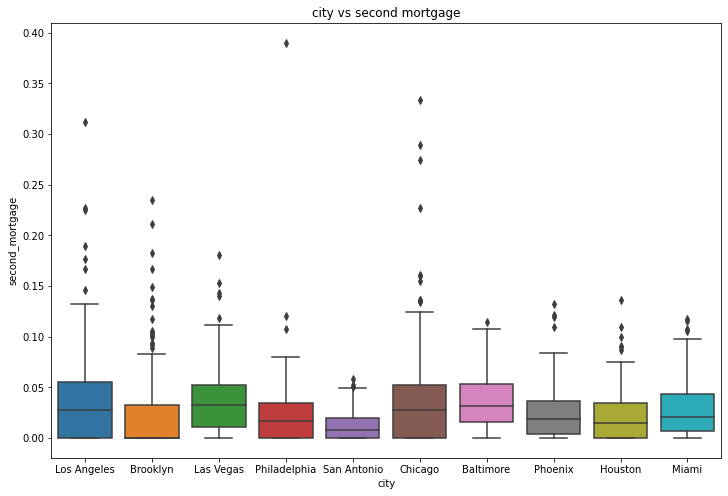

In [41]:
plt.subplots(figsize=(12,8))
ax = sns.boxplot(x = 'city',y = 'second_mortgage',data = train_subset_city)
plt.title('city vs second mortgage')
plt.show()

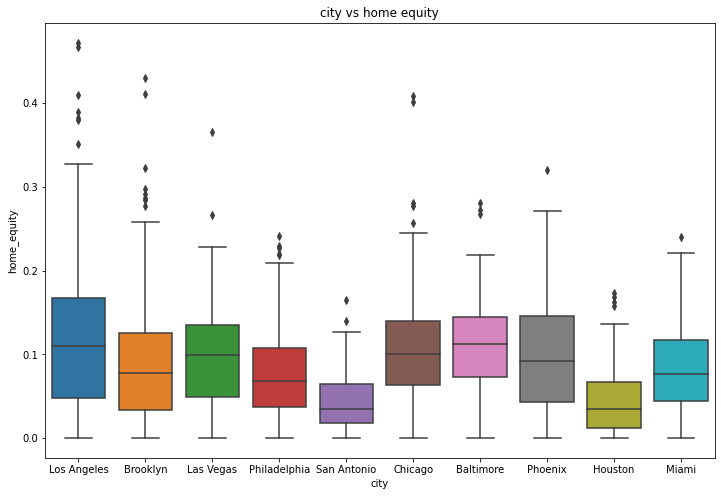

In [42]:
plt.subplots(figsize=(12,8))
ax = sns.boxplot(x = 'city',y = 'home_equity',data = train_subset_city)
plt.title('city vs home equity')
plt.show()

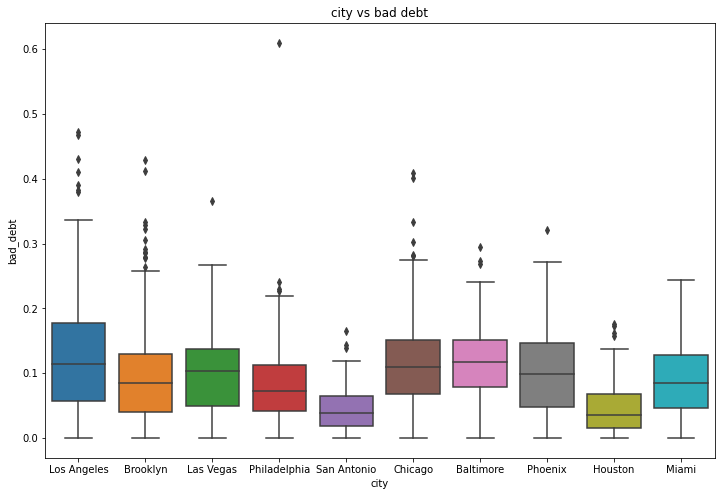

In [43]:
plt.subplots(figsize=(12,8))
ax = sns.boxplot(x = 'city',y = 'bad_debt',data = train_subset_city)
plt.title('city vs bad debt')
plt.show()

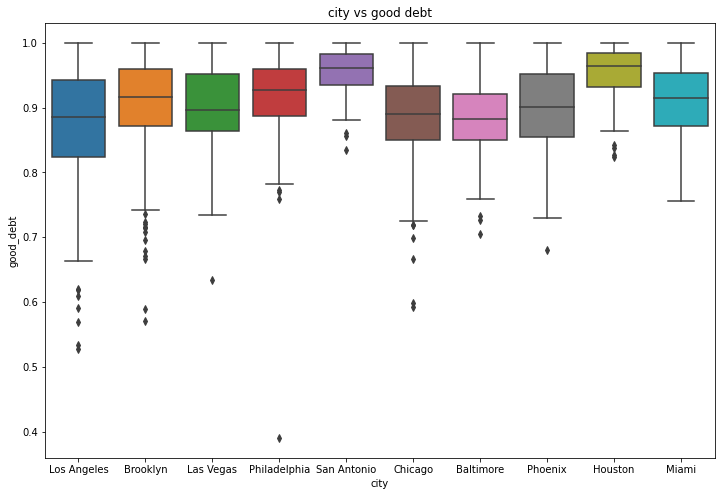

In [44]:
plt.subplots(figsize=(12,8))
ax = sns.boxplot(x = 'city',y = 'good_debt',data = train_subset_city)
plt.title('city vs good debt')
plt.show()

In [45]:
train['remaining_income'] = train['family_median'] - train['hi_median']

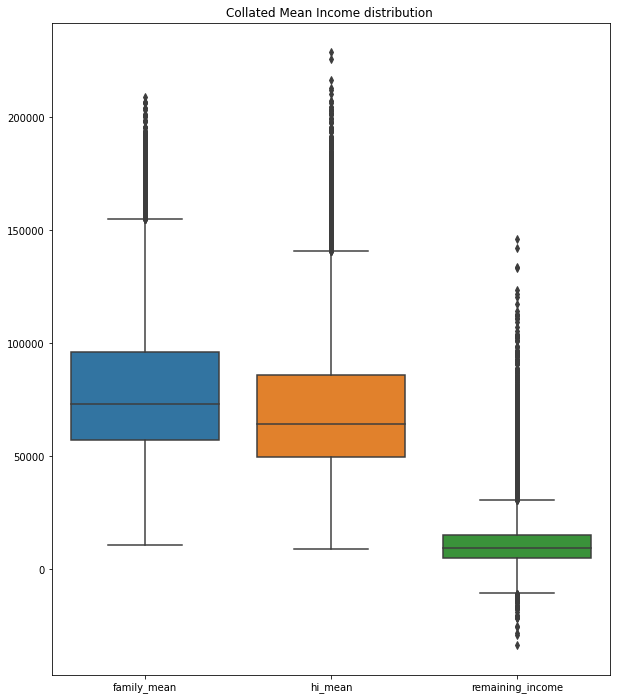

In [46]:
plt.subplots(figsize=(10,12))
ax = sns.boxplot(data = train[['family_mean', 'hi_mean', 'remaining_income']])
plt.title('Collated Mean Income distribution ')
plt.show()

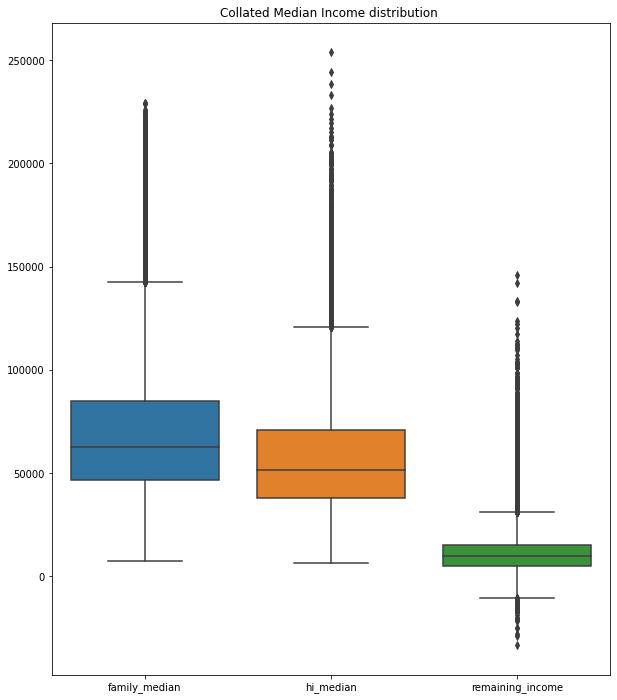

In [47]:
plt.subplots(figsize=(10,12))
ax = sns.boxplot(data = train[['family_median', 'hi_median', 'remaining_income']])
plt.title('Collated Median Income distribution ')
plt.show()

In [48]:
train_density_eda = train[['pop','ALand','male_age_median','female_age_median','male_pop','female_pop']]
train_density_eda.head()

pop        ALand  male_age_median  female_age_median  male_pop  \
UID                                                                       
267822  5230  202183361.0         44.00000           45.33333      2612   
246444  2633    1560828.0         32.00000           37.58333      1349   
245683  6881   69561595.0         40.83333           42.83333      3643   
279653  2700    1105793.0         48.91667           50.58333      1141   
247218  5637    2554403.0         22.41667           21.58333      2586   

        female_pop  
UID                 
267822        2618  
246444        1284  
245683        3238  
279653        1559  
247218        3051

In [49]:
train_density_eda['pop_density'] = train_density_eda['pop'] / train_density_eda['ALand']
train_density_eda.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



pop        ALand  male_age_median  female_age_median  male_pop  \
UID                                                                       
267822  5230  202183361.0         44.00000           45.33333      2612   
246444  2633    1560828.0         32.00000           37.58333      1349   
245683  6881   69561595.0         40.83333           42.83333      3643   
279653  2700    1105793.0         48.91667           50.58333      1141   
247218  5637    2554403.0         22.41667           21.58333      2586   

        female_pop  pop_density  
UID                              
267822        2618     0.000026  
246444        1284     0.001687  
245683        3238     0.000099  
279653        1559     0.002442  
247218        3051     0.002207

In [50]:
train_density_eda['median_age'] = (train_density_eda['male_age_median'] *  train_density_eda['male_pop'] + train_density_eda['female_age_median'] *  train_density_eda['female_pop'])  / train_density_eda['pop']
train_density_eda.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



pop        ALand  male_age_median  female_age_median  male_pop  \
UID                                                                       
267822  5230  202183361.0         44.00000           45.33333      2612   
246444  2633    1560828.0         32.00000           37.58333      1349   
245683  6881   69561595.0         40.83333           42.83333      3643   
279653  2700    1105793.0         48.91667           50.58333      1141   
247218  5637    2554403.0         22.41667           21.58333      2586   

        female_pop  pop_density  median_age  
UID                                          
267822        2618     0.000026   44.667430  
246444        1284     0.001687   34.722748  
245683        3238     0.000099   41.774472  
279653        1559     0.002442   49.879012  
247218        3051     0.002207   21.965629

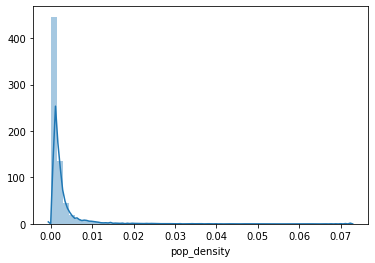

In [51]:
sns.distplot(train_density_eda['pop_density'])
plt.show()

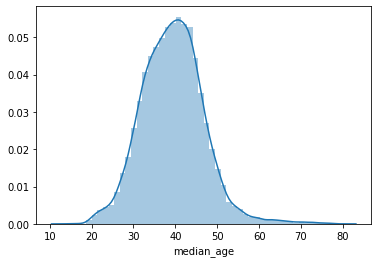

In [52]:
sns.distplot(train_density_eda['median_age'])
plt.show()

In [53]:
age_df = train[['state','male_pop','female_pop','male_age_median','female_age_median','married','separated','divorced']]
age_df.head()

state  male_pop  female_pop  male_age_median  female_age_median  \
UID                                                                             
267822     New York      2612        2618         44.00000           45.33333   
246444      Indiana      1349        1284         32.00000           37.58333   
245683      Indiana      3643        3238         40.83333           42.83333   
279653  Puerto Rico      1141        1559         48.91667           50.58333   
247218       Kansas      2586        3051         22.41667           21.58333   

        married  separated  divorced  
UID                                   
267822  0.57851    0.01240   0.08770  
246444  0.34886    0.01426   0.09030  
245683  0.64745    0.01607   0.10657  
279653  0.47257    0.02021   0.10106  
247218  0.12356    0.00000   0.03109

In [54]:
bins = [0,18,30,45,60,100]
labels = ['teenager','youth','middle_aged','little_old','old']

In [55]:
age_df['male_pop_bins'] = pd.cut(age_df['male_age_median'],bins=bins,labels=labels)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
age_df.head()

state  male_pop  female_pop  male_age_median  female_age_median  \
UID                                                                             
267822     New York      2612        2618         44.00000           45.33333   
246444      Indiana      1349        1284         32.00000           37.58333   
245683      Indiana      3643        3238         40.83333           42.83333   
279653  Puerto Rico      1141        1559         48.91667           50.58333   
247218       Kansas      2586        3051         22.41667           21.58333   

        married  separated  divorced male_pop_bins  
UID                                                 
267822  0.57851    0.01240   0.08770   middle_aged  
246444  0.34886    0.01426   0.09030   middle_aged  
245683  0.64745    0.01607   0.10657   middle_aged  
279653  0.47257    0.02021   0.10106    little_old  
247218  0.12356    0.00000   0.03109         youth

In [57]:
age_df['female_pop_bins'] = pd.cut(age_df['female_age_median'],bins=bins,labels=labels)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
age_df.head()

state  male_pop  female_pop  male_age_median  female_age_median  \
UID                                                                             
267822     New York      2612        2618         44.00000           45.33333   
246444      Indiana      1349        1284         32.00000           37.58333   
245683      Indiana      3643        3238         40.83333           42.83333   
279653  Puerto Rico      1141        1559         48.91667           50.58333   
247218       Kansas      2586        3051         22.41667           21.58333   

        married  separated  divorced male_pop_bins female_pop_bins  
UID                                                                 
267822  0.57851    0.01240   0.08770   middle_aged      little_old  
246444  0.34886    0.01426   0.09030   middle_aged     middle_aged  
245683  0.64745    0.01607   0.10657   middle_aged     middle_aged  
279653  0.47257    0.02021   0.10106    little_old      little_old  
247218  0.12356    0.00000   0.03109         youth           youth

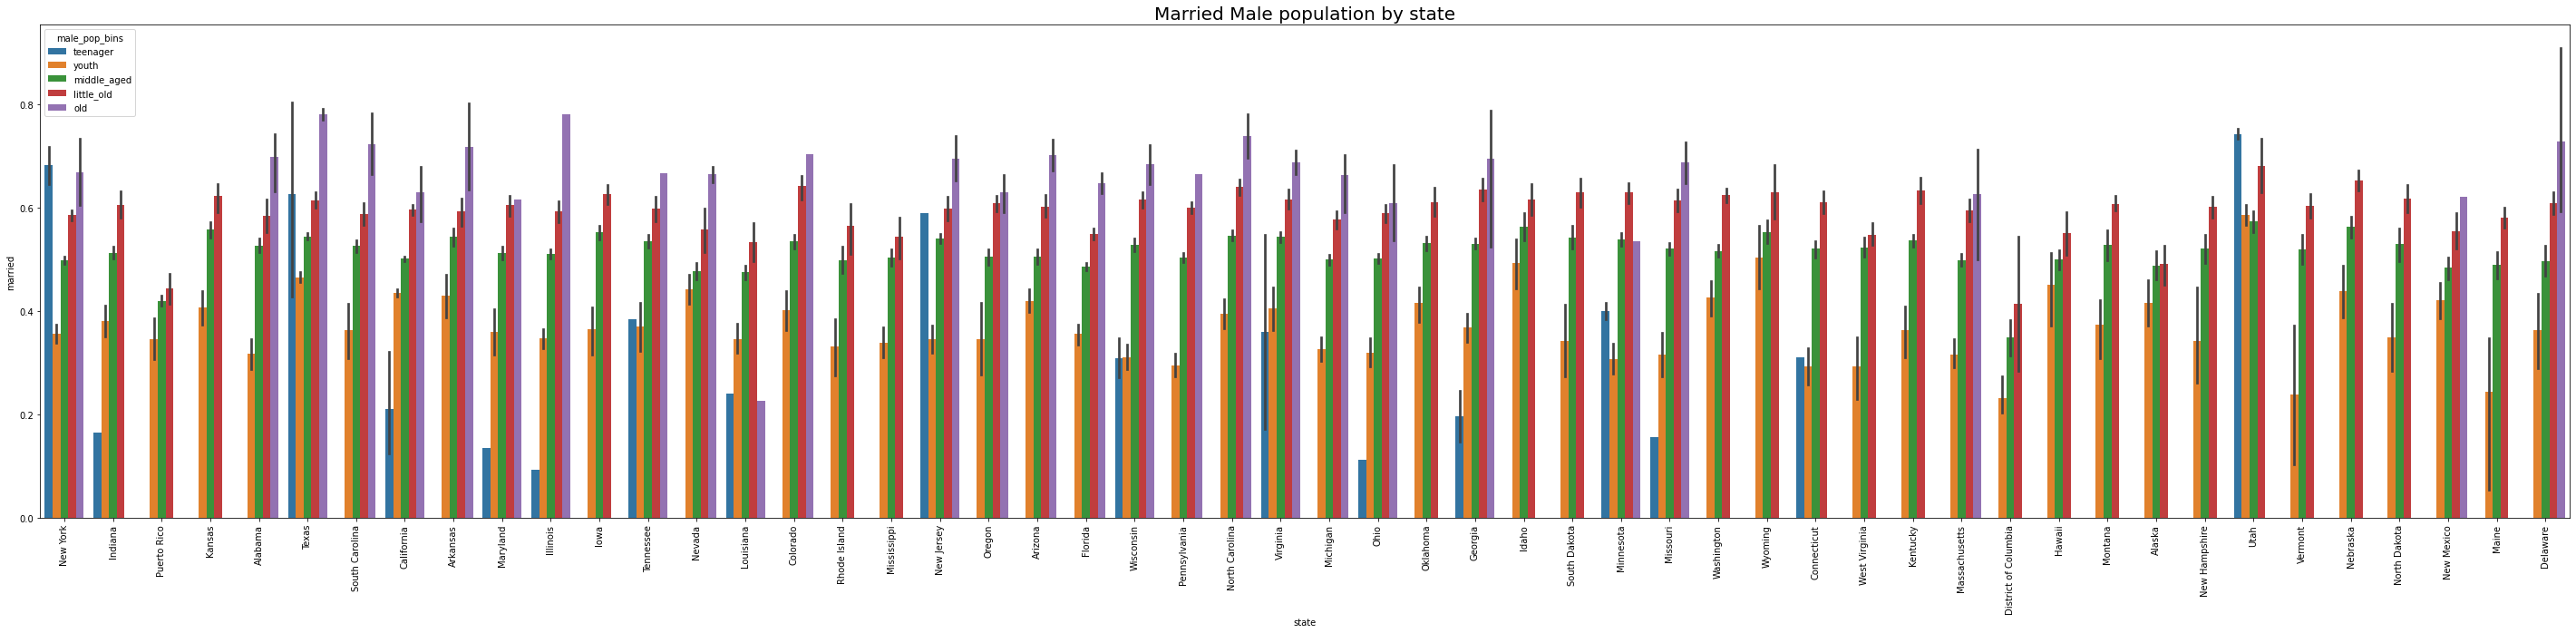

In [59]:
plt.figure(figsize = (50, 10))
ax = sns.barplot(x = 'state', y = 'married', hue = 'male_pop_bins', data = age_df)
plt.xticks(rotation = 90)
ax.set_title('Married Male population by state', fontsize = 20)
plt.show()

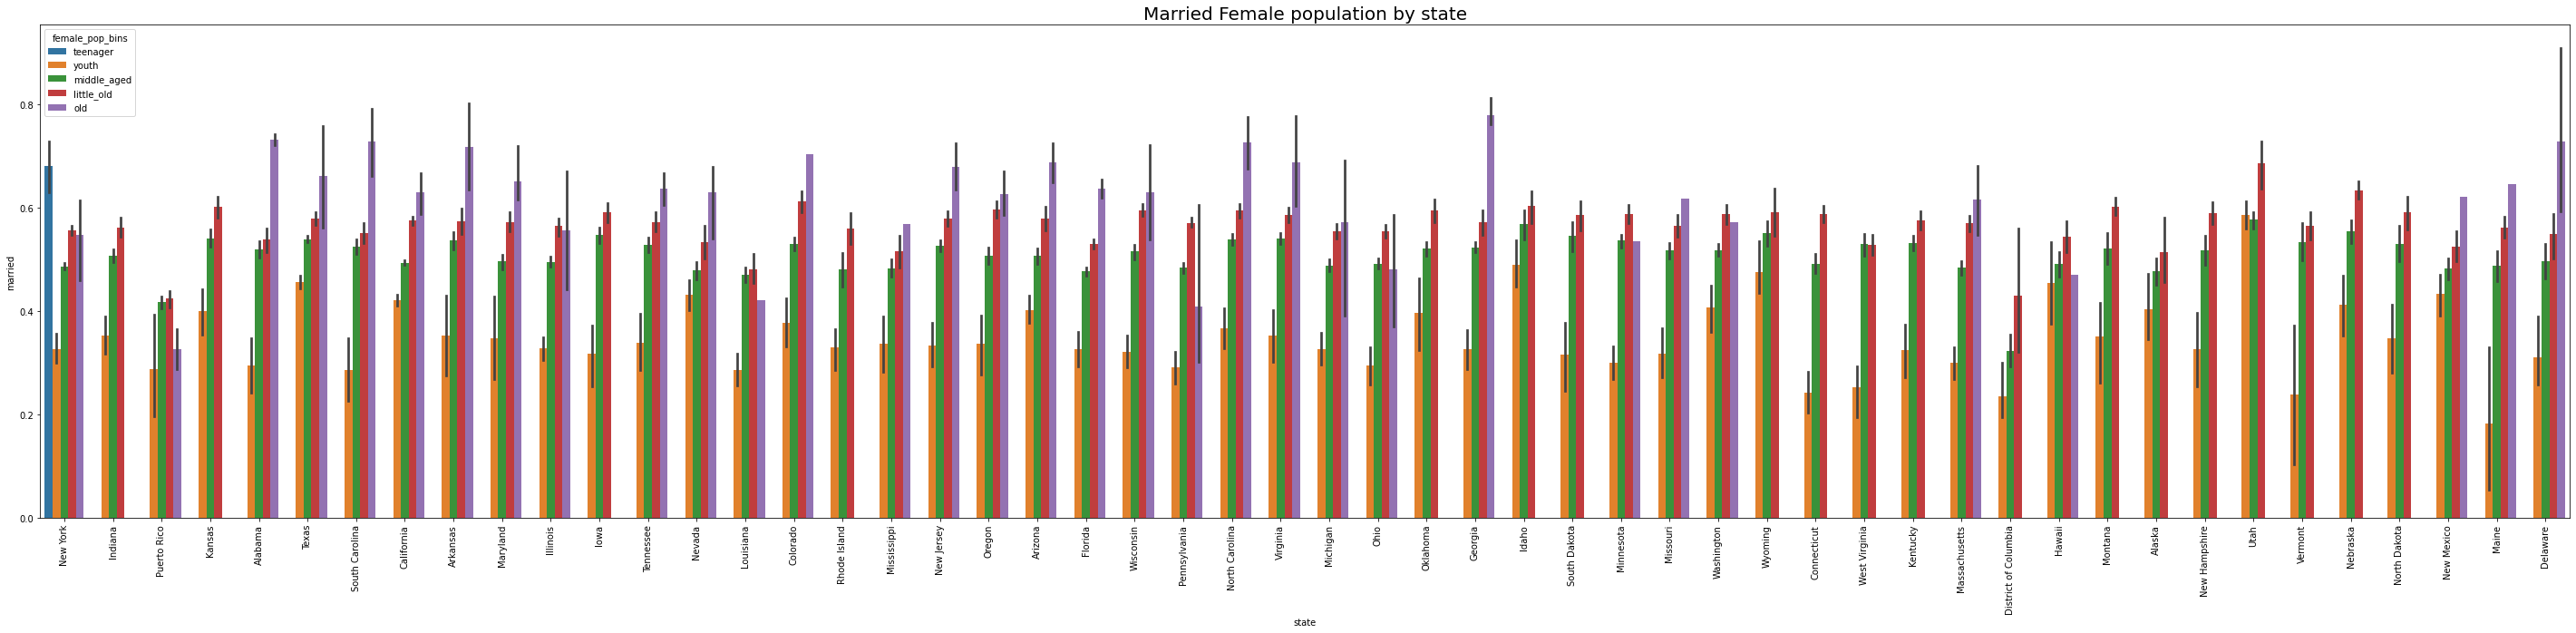

In [60]:
plt.figure(figsize = (50, 10))
ax = sns.barplot(x = 'state', y = 'married', hue = 'female_pop_bins', data = age_df)
plt.xticks(rotation = 90)
ax.set_title('Married Female population by state', fontsize = 20)
plt.show()

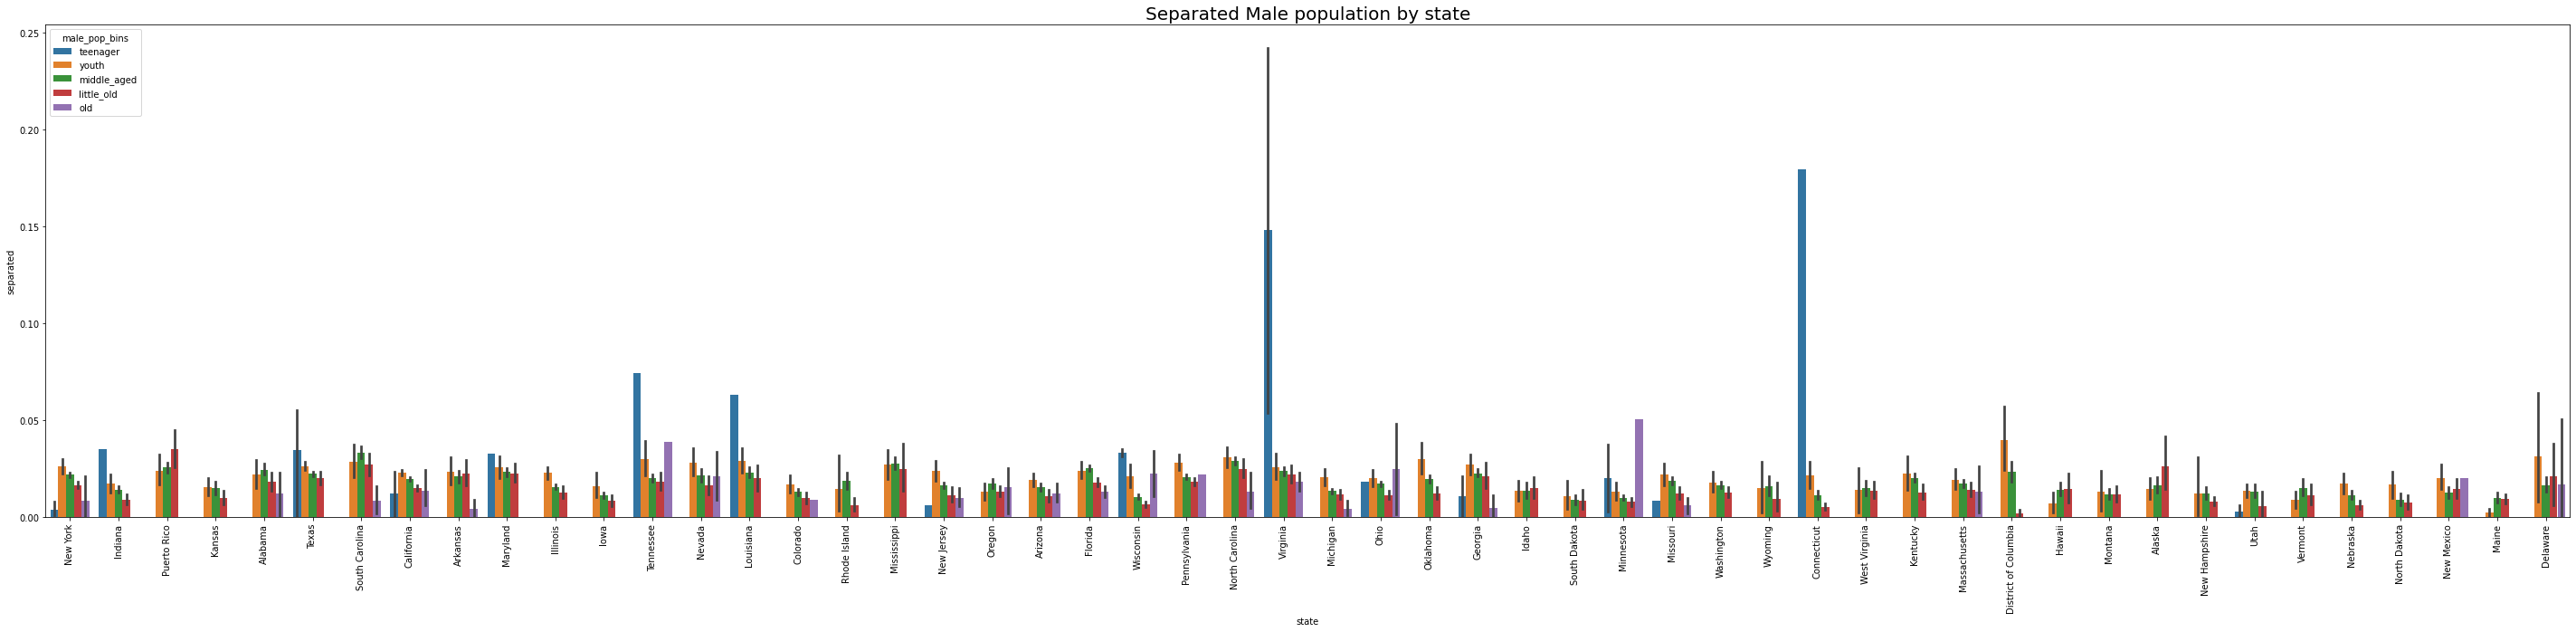

In [61]:
plt.figure(figsize = (50, 10))
ax = sns.barplot(x = 'state', y = 'separated', hue = 'male_pop_bins', data = age_df)
plt.xticks(rotation = 90)
ax.set_title('Separated Male population by state', fontsize = 20)
plt.show()

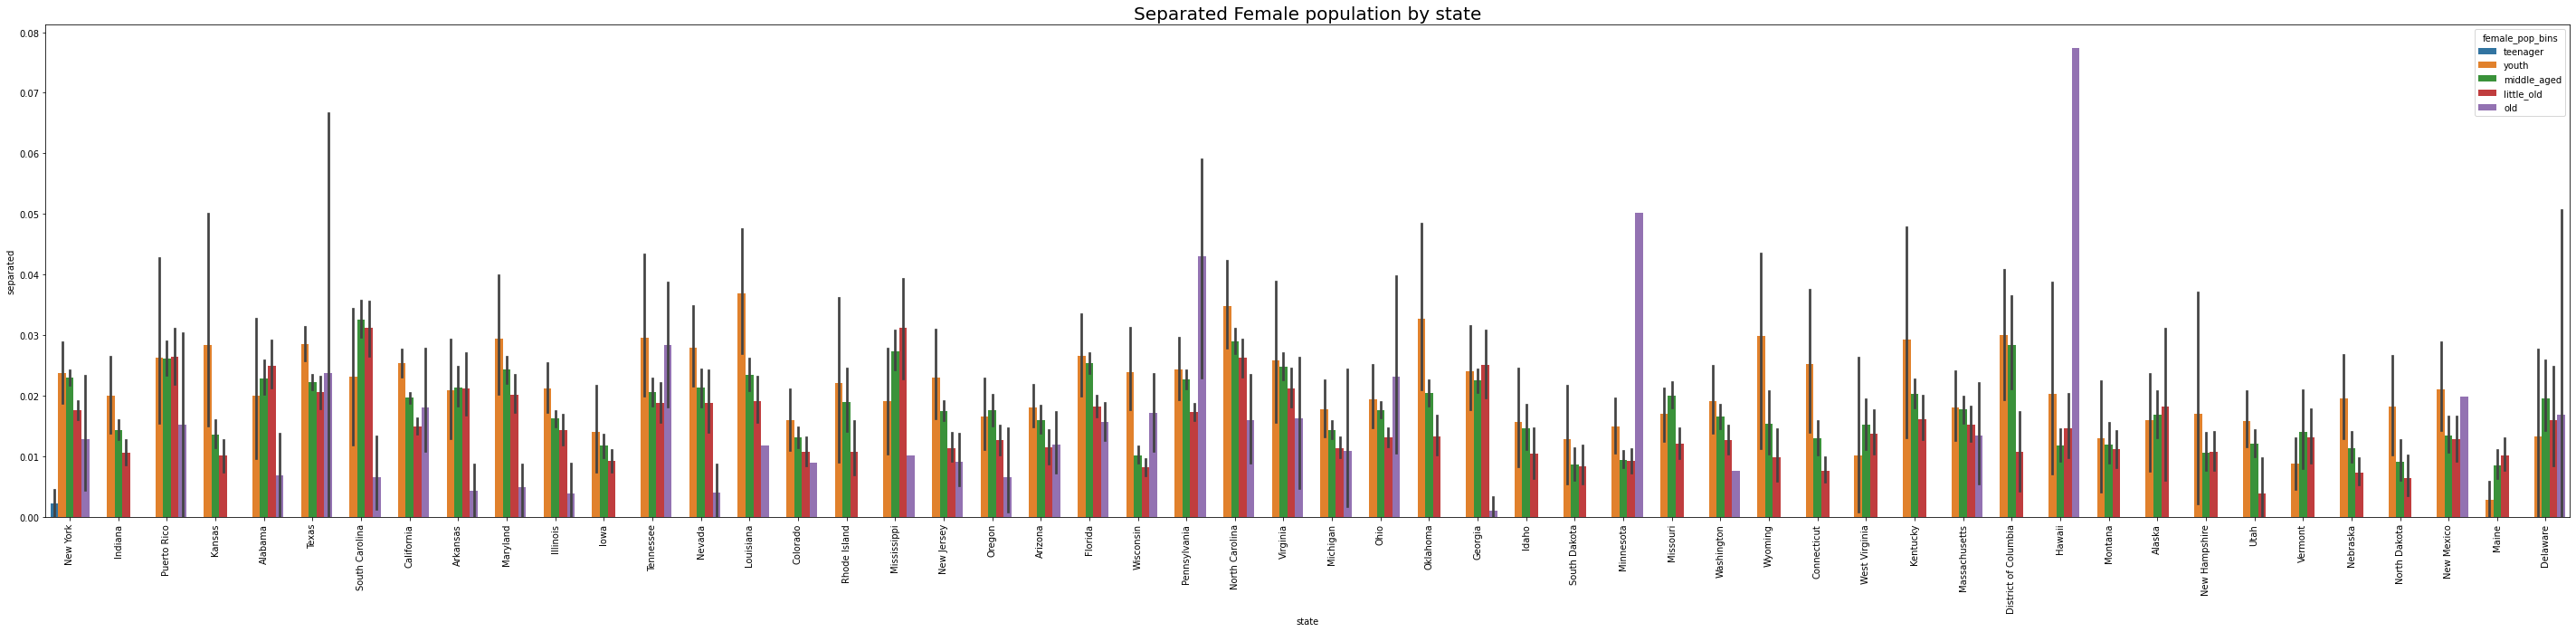

In [62]:
plt.figure(figsize = (50, 10))
ax = sns.barplot(x = 'state', y = 'separated', hue = 'female_pop_bins', data = age_df)
plt.xticks(rotation = 90)
ax.set_title('Separated Female population by state', fontsize = 20)
plt.show()

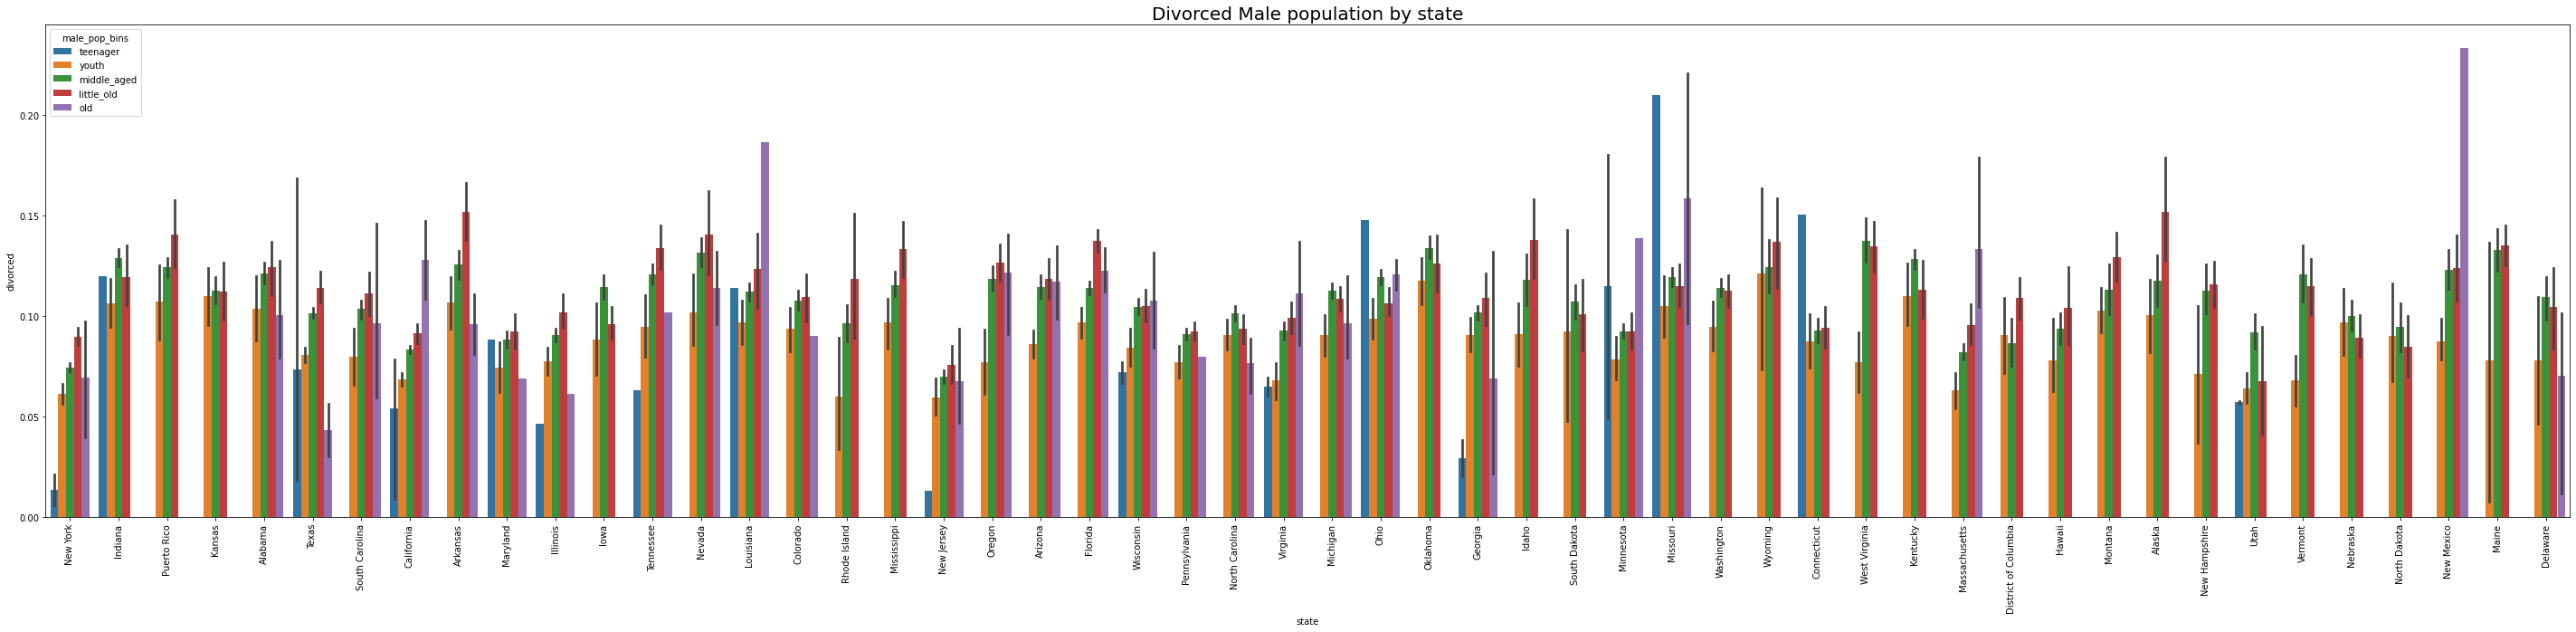

In [63]:
plt.figure(figsize = (50, 10))
ax = sns.barplot(x = 'state', y = 'divorced', hue = 'male_pop_bins', data = age_df)
plt.xticks(rotation = 90)
ax.set_title('Divorced Male population by state', fontsize = 20)
plt.show()

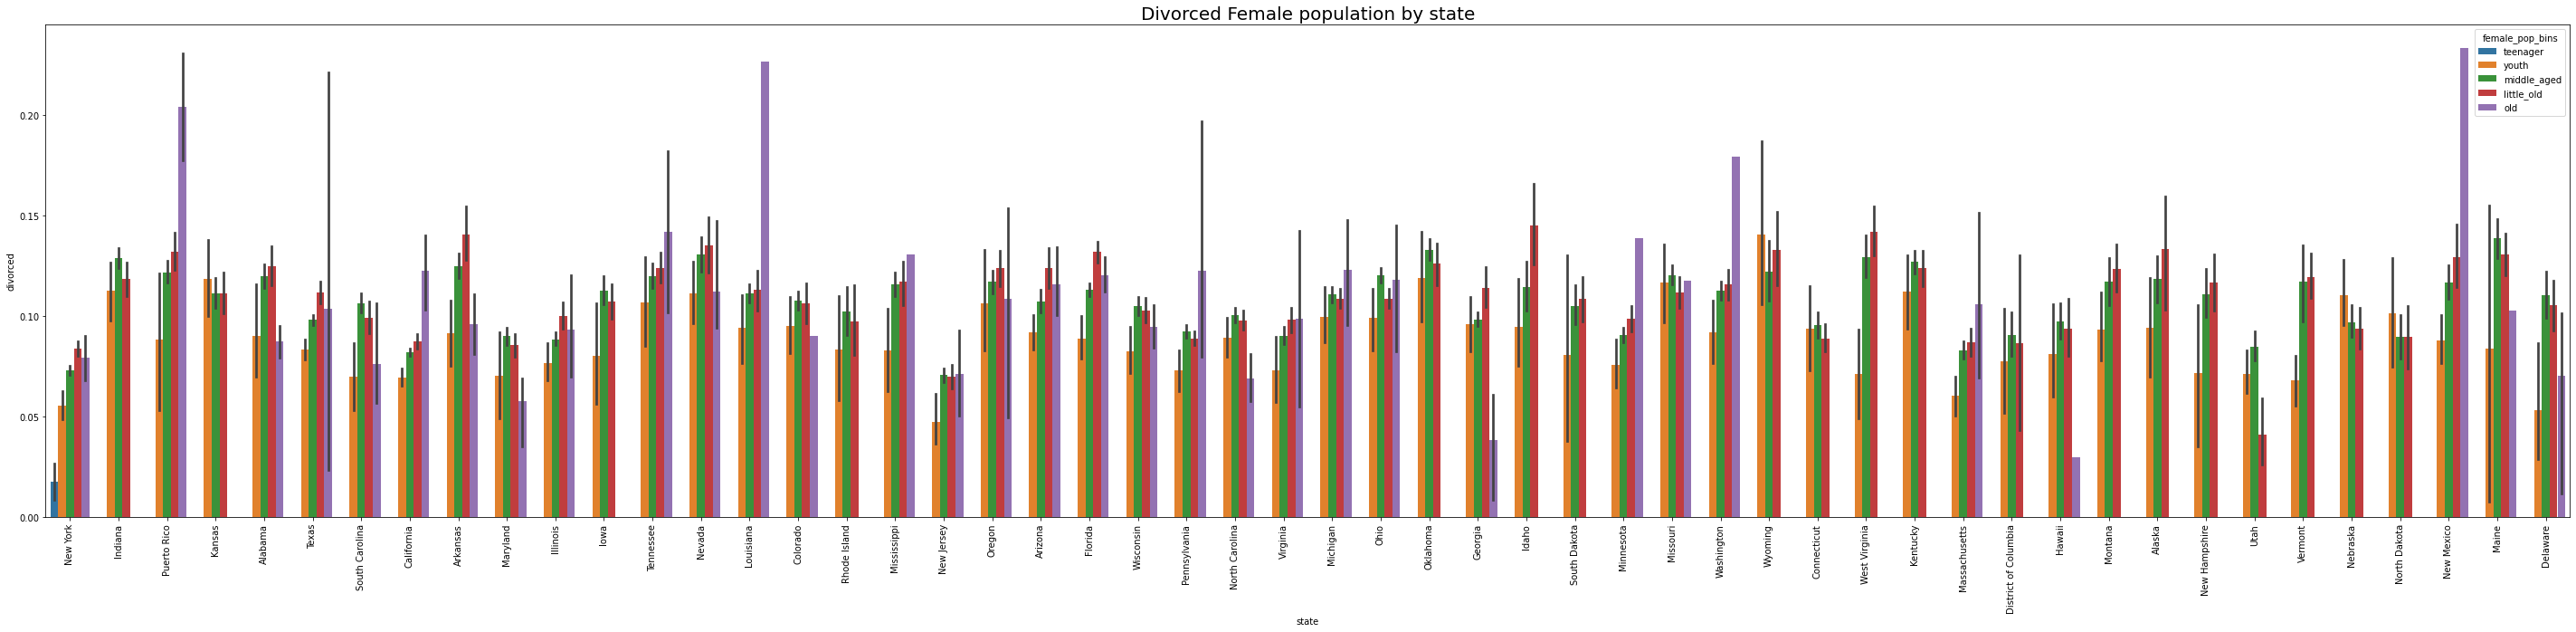

In [64]:
plt.figure(figsize = (50, 10))
ax = sns.barplot(x = 'state', y = 'divorced', hue = 'female_pop_bins', data = age_df)
plt.xticks(rotation = 90)
ax.set_title('Divorced Female population by state', fontsize = 20)
plt.show()

In [65]:
train.head()

COUNTYID  STATEID        state state_ab        city           place  \
UID                                                                           
267822        53       36     New York       NY    Hamilton        Hamilton   
246444       141       18      Indiana       IN  South Bend        Roseland   
245683        63       18      Indiana       IN    Danville        Danville   
279653       127       72  Puerto Rico       PR    San Juan        Guaynabo   
247218       161       20       Kansas       KS   Manhattan  Manhattan City   

         type  zip_code  area_code        lat        lng        ALand  \
UID                                                                     
267822   City     13346        315  42.840812 -75.501524  202183361.0   
246444   City     46616        574  41.701441 -86.266614    1560828.0   
245683   City     46122        317  39.792202 -86.515246   69561595.0   
279653  Urban       927        787  18.396103 -66.104169    1105793.0   
247218   City     66502        785  39.195573 -96.569366    2554403.0   

         AWater   pop  male_pop  female_pop  rent_mean  rent_median  \
UID                                                                   
267822  1699120  5230      2612        2618  769.38638        784.0   
246444   100363  2633      1349        1284  804.87924        848.0   
245683   284193  6881      3643        3238  742.77365        703.0   
279653        0  2700      1141        1559  803.42018        782.0   
247218        0  5637      2586        3051  938.56493        881.0   

        rent_stdev  rent_sample_weight  rent_samples  rent_gt_10  rent_gt_15  \
UID                                                                            
267822   232.63967           272.34441         362.0     0.86761     0.79155   
246444   253.46747           312.58622         513.0     0.97410     0.93227   
245683   323.39011           291.85520         378.0     0.95238     0.88624   
279653   297.39258           259.30316         368.0     0.94693     0.87151   
247218   392.44096          1005.42886        1704.0     0.99286     0.98247   

        rent_gt_20  rent_gt_25  rent_gt_30  rent_gt_35  rent_gt_40  \
UID                                                                  
267822     0.59155     0.45634     0.42817     0.18592     0.15493   
246444     0.69920     0.69920     0.55179     0.41235     0.39044   
245683     0.79630     0.66667     0.39153     0.39153     0.28307   
279653     0.69832     0.61732     0.51397     0.46927     0.35754   
247218     0.91688     0.84740     0.78247     0.60974     0.55455   

        rent_gt_50  universe_samples  used_samples      hi_mean  hi_median  \
UID                                                                          
267822     0.12958               387           355  63125.28406    48120.0   
246444     0.27888               542           502  41931.92593    35186.0   
245683     0.15873               459           378  84942.68317    74964.0   
279653     0.32961               438           358  48733.67116    37845.0   
247218     0.44416              1725          1540  31834.15466    22497.0   

           hi_stdev  hi_sample_weight  hi_samples  family_mean  family_median  \
UID                                                                             
267822  49042.01206        1290.96240      2024.0  67994.14790        53245.0   
246444  31639.50203         838.74664      1127.0  50670.10337        43023.0   
245683  56811.62186        1155.20980      2488.0  95262.51431        85395.0   
279653  45100.54010         928.32193      1267.0  56401.68133        44399.0   
247218  34046.50907        1548.67477      1983.0  54053.42396        50272.0   

        family_stdev  family_sample_weight  family_samples  hc_mortgage_mean  \
UID                                                                            
267822   47667.30119             884.33516          1491.0        1414.80295   
246444   34715.57548             375.

In [66]:
state_rent = train.groupby('state')[['rent_median','hi_median']].median()
state_rent

rent_median  hi_median
state                                       
Alabama                     681.0    40203.0
Alaska                     1071.5    69880.5
Arizona                     950.0    48956.0
Arkansas                    660.0    38973.5
California                 1333.0    62252.5
Colorado                   1090.0    61621.0
Connecticut                1169.0    76957.0
Delaware                   1022.0    60642.0
District of Columbia       1123.0    68846.0
Florida                    1012.0    45475.0
Georgia                     854.0    45917.0
Hawaii                     1416.0    72312.0
Idaho                       731.0    45678.0
Illinois                    912.0    54703.0
Indiana                     736.0    46429.0
Iowa                        652.0    51345.0
Kansas                      709.0    47697.0
Kentucky                    659.0    39967.0
Louisiana                   772.0    42520.0
Maine                       774.5    44858.0
Maryland                   1285.0    76051.0
Massachusetts              1123.0    69613.0
Michigan                    784.0    47870.5
Minnesota                   852.5    58905.0
Mississippi                 689.0    35492.0
Missouri                    750.0    45179.5
Montana                     679.0    45510.0
Nebraska                    712.0    51472.0
Nevada                     1046.0    52784.0
New Hampshire               991.0    66038.0
New Jersey                 1253.5    73875.5
New Mexico                  729.0    42156.0
New York                   1197.0    59967.0
North Carolina              761.0    45158.0
North Dakota                655.0    54700.0
Ohio                        727.0    47689.0
Oklahoma                    686.0    43487.0
Oregon                      906.0    50419.0
Pennsylvania                829.0    52820.0
Puerto Rico                 457.5    17977.0
Rhode Island                947.0    56493.0
South Carolina              766.0    42153.0
South Dakota                616.0    48439.0
Tennessee                   731.0    41577.0
Texas                       845.5    48960.0
Utah                        965.0    60968.5
Vermont                     868.0    52658.0
Virginia                   1112.0    62910.0
Washington                 1002.0    58428.5
West Virginia               628.5    40308.0
Wisconsin                   766.0    52108.0
Wyoming                     802.5    58582.0

In [67]:
rent_as_pct_income_overall = (state_rent['rent_median'].sum() / state_rent['hi_median'].sum())*100
rent_as_pct_income_overall

1.6687203615872597

In [68]:
state_rent['rent_as_pct_income'] = (state_rent['rent_median'] / state_rent['hi_median'])*100
state_rent

rent_median  hi_median  rent_as_pct_income
state                                                           
Alabama                     681.0    40203.0            1.693903
Alaska                     1071.5    69880.5            1.533332
Arizona                     950.0    48956.0            1.940518
Arkansas                    660.0    38973.5            1.693458
California                 1333.0    62252.5            2.141279
Colorado                   1090.0    61621.0            1.768877
Connecticut                1169.0    76957.0            1.519030
Delaware                   1022.0    60642.0            1.685301
District of Columbia       1123.0    68846.0            1.631177
Florida                    1012.0    45475.0            2.225399
Georgia                     854.0    45917.0            1.859878
Hawaii                     1416.0    72312.0            1.958181
Idaho                       731.0    45678.0            1.600333
Illinois                    912.0    54703.0            1.667185
Indiana                     736.0    46429.0            1.585216
Iowa                        652.0    51345.0            1.269841
Kansas                      709.0    47697.0            1.486467
Kentucky                    659.0    39967.0            1.648860
Louisiana                   772.0    42520.0            1.815616
Maine                       774.5    44858.0            1.726559
Maryland                   1285.0    76051.0            1.689656
Massachusetts              1123.0    69613.0            1.613204
Michigan                    784.0    47870.5            1.637752
Minnesota                   852.5    58905.0            1.447246
Mississippi                 689.0    35492.0            1.941283
Missouri                    750.0    45179.5            1.660045
Montana                     679.0    45510.0            1.491980
Nebraska                    712.0    51472.0            1.383276
Nevada                     1046.0    52784.0            1.981661
New Hampshire               991.0    66038.0            1.500651
New Jersey                 1253.5    73875.5            1.696774
New Mexico                  729.0    42156.0            1.729291
New York                   1197.0    59967.0            1.996098
North Carolina              761.0    45158.0            1.685194
North Dakota                655.0    54700.0            1.197441
Ohio                        727.0    47689.0            1.524461
Oklahoma                    686.0    43487.0            1.577483
Oregon                      906.0    50419.0            1.796942
Pennsylvania                829.0    52820.0            1.569481
Puerto Rico                 457.5    17977.0            2.544919
Rhode Island                947.0    56493.0            1.676314
South Carolina              766.0    42153.0            1.817190
South Dakota                616.0    48439.0            1.271703
Tennessee                   731.0    41577.0            1.758184
Texas                       845.5    48960.0            1.726920
Utah                        965.0    60968.5            1.582785
Vermont                     868.0    52658.0            1.648373
Virginia                   1112.0    62910.0            1.767605
Washington                 1002.0    58428.5            1.714917
West Virginia               628.5    40308.0            1.559244
Wisconsin                   766.0    52108.0            1.470024
Wyoming                     802.5    58582.0            1.369875

In [69]:
train['meadian_age'] = train_density_eda['median_age']

In [70]:
train.columns

Index(['COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type',
       'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater', 'pop',
       'male_pop', 'female_pop', 'rent_mean', 'rent_median', 'rent_stdev',
       'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15',
       'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40',
       'rent_gt_50', 'universe_samples', 'used_samples', 'hi_mean',
       'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 'hs_degree_

In [71]:
cor = train[['COUNTYID','STATEID','zip_code','type','pop','male_pop','female_pop', 'family_mean',
         'second_mortgage', 'home_equity', 'debt','hs_degree','hi_mean','hc_mean',
           'meadian_age','pct_own', 'married','separated', 'divorced']].corr()

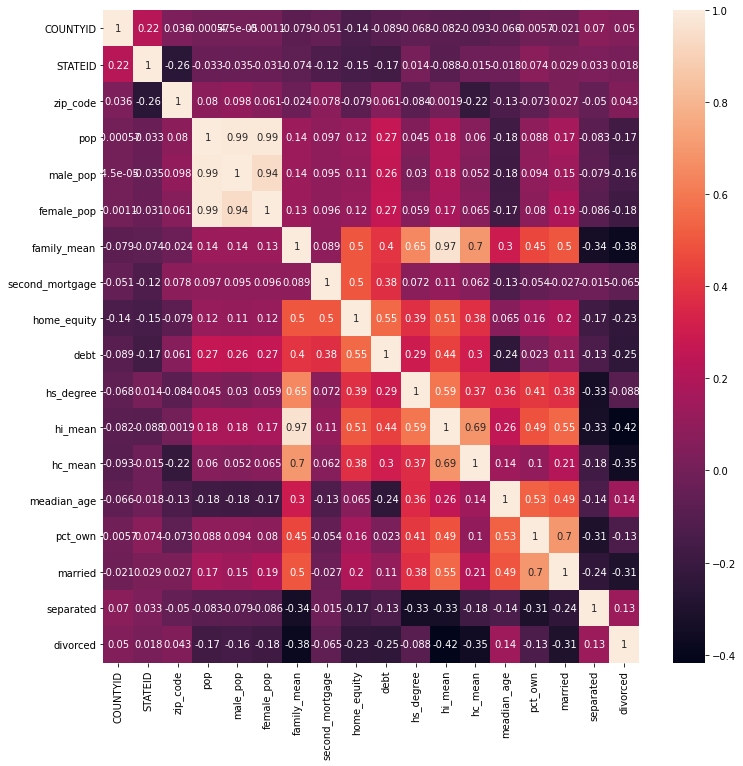

In [72]:
plt.figure(figsize=(12,12))
sns.heatmap(cor,annot=True)
plt.show()

In [73]:
from sklearn.decomposition import FactorAnalysis

In [74]:
fa = FactorAnalysis(n_components=5,random_state=11)

In [75]:
train_transformed = fa.fit_transform(train.select_dtypes(exclude=('object','category')))

In [76]:
train_transformed.shape

(26585, 5)

In [77]:
train_transformed

array([[-0.02174625,  0.06978994,  1.25438432, -0.3379435 , -0.3368652 ],
       [-0.02897086, -0.09746471,  0.1120596 , -0.88441509, -0.28839431],
       [-0.02814015, -0.04003848,  0.13308064,  0.53261952, -0.4300001 ],
       ...,
       [ 0.05000689,  0.99014488, -0.97034794,  0.46360024, -0.3329646 ],
       [-0.02870642, -0.08305636, -0.88574606,  3.11451733, -0.50294382],
       [-0.02942439, -0.09195811, -1.33280849, -0.70352571, -0.09956675]])

In [78]:
x_train = pd.read_csv('train.csv')
x_test = pd.read_csv('test.csv')

In [79]:
x_train.drop(['BLOCKID','SUMLEVEL'],axis=1,inplace=True)

In [80]:
x_train.dropna(axis=0,inplace=True)
x_train.head()

UID  COUNTYID  STATEID        state state_ab        city  \
0  267822        53       36     New York       NY    Hamilton   
1  246444       141       18      Indiana       IN  South Bend   
2  245683        63       18      Indiana       IN    Danville   
3  279653       127       72  Puerto Rico       PR    San Juan   
4  247218       161       20       Kansas       KS   Manhattan   

            place   type primary  zip_code  area_code        lat        lng  \
0        Hamilton   City   tract     13346        315  42.840812 -75.501524   
1        Roseland   City   tract     46616        574  41.701441 -86.266614   
2        Danville   City   tract     46122        317  39.792202 -86.515246   
3        Guaynabo  Urban   tract       927        787  18.396103 -66.104169   
4  Manhattan City   City   tract     66502        785  39.195573 -96.569366   

         ALand   AWater   pop  male_pop  female_pop  rent_mean  rent_median  \
0  202183361.0  1699120  5230      2612        2618  769.38638        784.0   
1    1560828.0   100363  2633      1349        1284  804.87924        848.0   
2   69561595.0   284193  6881      3643        3238  742.77365        703.0   
3    1105793.0        0  2700      1141        1559  803.42018        782.0   
4    2554403.0        0  5637      2586        3051  938.56493        881.0   

   rent_stdev  rent_sample_weight  rent_samples  rent_gt_10  rent_gt_15  \
0   232.63967           272.34441         362.0     0.86761     0.79155   
1   253.46747           312.58622         513.0     0.97410     0.93227   
2   323.39011           291.85520         378.0     0.95238     0.88624   
3   297.39258           259.30316         368.0     0.94693     0.87151   
4   392.44096          1005.42886        1704.0     0.99286     0.98247   

   rent_gt_20  rent_gt_25  rent_gt_30  rent_gt_35  rent_gt_40  rent_gt_50  \
0     0.59155     0.45634     0.42817     0.18592     0.15493     0.12958   
1     0.69920     0.69920     0.55179     0.41235     0.39044     0.27888   
2     0.79630     0.66667     0.39153     0.39153     0.28307     0.15873   
3     0.69832     0.61732     0.51397     0.46927     0.35754     0.32961   
4     0.91688     0.84740     0.78247     0.60974     0.55455     0.44416   

   universe_samples  used_samples      hi_mean  hi_median     hi_stdev  \
0               387           355  63125.28406    48120.0  49042.01206   
1               542           502  41931.92593    35186.0  31639.50203   
2               459           378  84942.68317    74964.0  56811.62186   
3               438           358  48733.67116    37845.0  45100.54010   
4              1725          1540  31834.15466    22497.0  34046.50907   

   hi_sample_weight  hi_samples  family_mean  family_median  family_stdev  \
0        1290.96240      2024.0  67994.14790        53245.0   47667.30119   
1         838.74664      1127.0  50670.10337        43023.0   34715.57548   
2        1155.20980      2488.0  95262.51431        85395.0   49292.67664   
3         928.32193      1267.0  56401.68133        44399.0   41082.90515   
4        1548.67477      1983.0  54053.42396        50272.0   39609.12605   

   family_sample_weight  family_samples  hc_mortgage_mean  hc_mortgage_median  \
0             884.33516          1491.0        1414.80295              1223.0   
1             375.28798           554.0         864.41390               784.0   
2             709.74925          1889.0        1506.06758              1361.0   
3             490.18479           729.0        1175.28642              1101.0   
4             244.08903           395.0        1192.58759              1125.0   

   hc_mortgage_stdev  hc_mortgage_sample_weight  hc_mortgage_samples  \
0          641.22898                  377.83135                867.0   
1          482.27020                  316.88320                356.0   
2          731.89394                  699.41354               1491.0   
3          428.98751                  261.28471               

In [81]:
x_train.drop_duplicates(inplace=True)

In [82]:
x_train.shape

(26585, 78)

In [83]:
x_test.head()

UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID         state state_ab  \
0  255504      NaN       140       163       26      Michigan       MI   
1  252676      NaN       140         1       23         Maine       ME   
2  276314      NaN       140        15       42  Pennsylvania       PA   
3  248614      NaN       140       231       21      Kentucky       KY   
4  286865      NaN       140       355       48         Texas       TX   

             city                  place     type primary  zip_code  \
0         Detroit  Dearborn Heights City      CDP   tract     48239   
1          Auburn            Auburn City     City   tract      4210   
2       Pine City              Millerton  Borough   tract     14871   
3      Monticello        Monticello City     City   tract     42633   
4  Corpus Christi                  Edroy     Town   tract     78410   

   area_code        lat        lng      ALand   AWater   pop  male_pop  \
0        313  42.346422 -83.252823    2711280    39555  3417      1479   
1        207  44.100724 -70.257832   14778785  2705204  3796      1846   
2        607  41.948556 -76.783808  258903666   863840  3944      2065   
3        606  36.746009 -84.766870  501694825  2623067  2508      1427   
4        361  27.882461 -97.678586   13796057   497689  6230      3274   

   female_pop   rent_mean  rent_median  rent_stdev  rent_sample_weight  \
0        1938   858.57169        859.0   232.39082           276.07497   
1        1950   832.68625        750.0   267.22342           183.32299   
2        1879   816.00639        755.0   416.25699           141.39063   
3        1081   418.68937        385.0   156.92024            88.95960   
4        2956  1031.63763        997.0   326.76727           277.39844   

   rent_samples  rent_gt_10  rent_gt_15  rent_gt_20  rent_gt_25  rent_gt_30  \
0         424.0     1.00000     0.95696     0.85316     0.85316     0.85316   
1         245.0     1.00000     1.00000     0.86611     0.67364     0.30962   
2         217.0     0.97573     0.93204     0.78641     0.71845     0.63592   
3          93.0     1.00000     0.93548     0.93548     0.64516     0.55914   
4         624.0     0.72276     0.66506     0.53526     0.38301     0.18910   

   rent_gt_35  rent_gt_40  rent_gt_50  universe_samples  used_samples  \
0     0.85316     0.76962     0.63544               435           395   
1     0.30962     0.30962     0.27197               275           239   
2     0.47573     0.43689     0.32524               245           206   
3     0.46237     0.46237     0.36559               153            93   
4     0.16667     0.14263     0.11058               660           624   

        hi_mean  hi_median     hi_stdev  hi_sample_weight  hi_samples  \
0   48899.52121    38746.0  44392.20902         798.02401      1180.0   
1   72335.33234    61008.0  51895.81159         922.82969      1722.0   
2   58501.15901    51648.0  45245.27248         893.07759      1461.0   
3   38237.55059    31612.0  34527.61607         775.17947       957.0   
4  114456.07790    94211.0  81950.95692         836.30759      2404.0   

    family_mean  family_median  family_stdev  family_sample_weight  \
0   53802.87122        45167.0   43756.56479             464.30972   
1   85642.22095        74759.0   49156.72870             482.99945   
2   65694.06582        57186.0   44239.31893             619.73962   
3   44156.38709        34687.0   34899.74300             535.21987   
4  123527.02420       103898.0   72173.55823             507.42257   

   family_samples  hc_mortgage_mean  hc_mortgage_median  hc_mortgage_stdev  \
0           769.0        1139.24548              1109.0          336.47710   
1          1147.0        1533.25988              1438.0          536.61118   
2          1084.0        1254.54462              1089.0          596.85204   
3           689.0         862.65763               749.0          624.42157   
4          1738.0        1996.41425              1907.0          740.21168   

 

In [84]:
x_test.shape

(11709, 80)

In [85]:
x_test.drop(['BLOCKID','SUMLEVEL'],axis=1,inplace=True)

In [86]:
x_test.isna().sum()

UID              0
COUNTYID         0
STATEID          0
state            0
state_ab         0
              ... 
pct_own        122
married         84
married_snp     84
separated       84
divorced        84
Length: 78, dtype: int64

In [87]:
x_test.dropna(axis=0,inplace=True)

In [88]:
x_test.drop_duplicates(inplace=True)

In [89]:
x_test.shape

(11355, 78)

In [90]:
imp_feature = x_train.select_dtypes(exclude=('object','category'))

In [91]:
imp_feature.head()

UID  COUNTYID  STATEID  zip_code  area_code        lat        lng  \
0  267822        53       36     13346        315  42.840812 -75.501524   
1  246444       141       18     46616        574  41.701441 -86.266614   
2  245683        63       18     46122        317  39.792202 -86.515246   
3  279653       127       72       927        787  18.396103 -66.104169   
4  247218       161       20     66502        785  39.195573 -96.569366   

         ALand   AWater   pop  male_pop  female_pop  rent_mean  rent_median  \
0  202183361.0  1699120  5230      2612        2618  769.38638        784.0   
1    1560828.0   100363  2633      1349        1284  804.87924        848.0   
2   69561595.0   284193  6881      3643        3238  742.77365        703.0   
3    1105793.0        0  2700      1141        1559  803.42018        782.0   
4    2554403.0        0  5637      2586        3051  938.56493        881.0   

   rent_stdev  rent_sample_weight  rent_samples  rent_gt_10  rent_gt_15  \
0   232.63967           272.34441         362.0     0.86761     0.79155   
1   253.46747           312.58622         513.0     0.97410     0.93227   
2   323.39011           291.85520         378.0     0.95238     0.88624   
3   297.39258           259.30316         368.0     0.94693     0.87151   
4   392.44096          1005.42886        1704.0     0.99286     0.98247   

   rent_gt_20  rent_gt_25  rent_gt_30  rent_gt_35  rent_gt_40  rent_gt_50  \
0     0.59155     0.45634     0.42817     0.18592     0.15493     0.12958   
1     0.69920     0.69920     0.55179     0.41235     0.39044     0.27888   
2     0.79630     0.66667     0.39153     0.39153     0.28307     0.15873   
3     0.69832     0.61732     0.51397     0.46927     0.35754     0.32961   
4     0.91688     0.84740     0.78247     0.60974     0.55455     0.44416   

   universe_samples  used_samples      hi_mean  hi_median     hi_stdev  \
0               387           355  63125.28406    48120.0  49042.01206   
1               542           502  41931.92593    35186.0  31639.50203   
2               459           378  84942.68317    74964.0  56811.62186   
3               438           358  48733.67116    37845.0  45100.54010   
4              1725          1540  31834.15466    22497.0  34046.50907   

   hi_sample_weight  hi_samples  family_mean  family_median  family_stdev  \
0        1290.96240      2024.0  67994.14790        53245.0   47667.30119   
1         838.74664      1127.0  50670.10337        43023.0   34715.57548   
2        1155.20980      2488.0  95262.51431        85395.0   49292.67664   
3         928.32193      1267.0  56401.68133        44399.0   41082.90515   
4        1548.67477      1983.0  54053.42396        50272.0   39609.12605   

   family_sample_weight  family_samples  hc_mortgage_mean  hc_mortgage_median  \
0             884.33516          1491.0        1414.80295              1223.0   
1             375.28798           554.0         864.41390               784.0   
2             709.74925          1889.0        1506.06758              1361.0   
3             490.18479           729.0        1175.28642              1101.0   
4             244.08903           395.0        1192.58759              1125.0   

   hc_mortgage_stdev  hc_mortgage_sample_weight  hc_mortgage_samples  \
0          641.22898                  377.83135                867.0   
1          482.27020                  316.88320                356.0   
2          731.89394                  699.41354               1491.0   
3          428.98751                  261.28471                437.0   
4          327.49674                   76.61052                134.0   

     hc_mean  hc_median   hc_stdev  hc_samples  hc_sample_weight  \
0  570.01530      558.0  270.11299       770.0         499.29293   
1  351.98293      336.0  125.40457       229.0         189.60606   
2  556.45986      532.0  184.42175       538.0         323.35354   
3  288.04047      247.0  185.55887       392.0         314.90566  

In [92]:
imp_feature.shape

(26585, 72)

In [93]:
to_drop = ['UID','COUNTYID', 'STATEID', 'zip_code', 'area_code', 'lat', 'lng']

In [94]:
for col in imp_feature.columns:
    if col in to_drop:
        imp_feature.drop(col,axis=1,inplace=True)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [95]:
imp_feature.head()

ALand   AWater   pop  male_pop  female_pop  rent_mean  rent_median  \
0  202183361.0  1699120  5230      2612        2618  769.38638        784.0   
1    1560828.0   100363  2633      1349        1284  804.87924        848.0   
2   69561595.0   284193  6881      3643        3238  742.77365        703.0   
3    1105793.0        0  2700      1141        1559  803.42018        782.0   
4    2554403.0        0  5637      2586        3051  938.56493        881.0   

   rent_stdev  rent_sample_weight  rent_samples  rent_gt_10  rent_gt_15  \
0   232.63967           272.34441         362.0     0.86761     0.79155   
1   253.46747           312.58622         513.0     0.97410     0.93227   
2   323.39011           291.85520         378.0     0.95238     0.88624   
3   297.39258           259.30316         368.0     0.94693     0.87151   
4   392.44096          1005.42886        1704.0     0.99286     0.98247   

   rent_gt_20  rent_gt_25  rent_gt_30  rent_gt_35  rent_gt_40  rent_gt_50  \
0     0.59155     0.45634     0.42817     0.18592     0.15493     0.12958   
1     0.69920     0.69920     0.55179     0.41235     0.39044     0.27888   
2     0.79630     0.66667     0.39153     0.39153     0.28307     0.15873   
3     0.69832     0.61732     0.51397     0.46927     0.35754     0.32961   
4     0.91688     0.84740     0.78247     0.60974     0.55455     0.44416   

   universe_samples  used_samples      hi_mean  hi_median     hi_stdev  \
0               387           355  63125.28406    48120.0  49042.01206   
1               542           502  41931.92593    35186.0  31639.50203   
2               459           378  84942.68317    74964.0  56811.62186   
3               438           358  48733.67116    37845.0  45100.54010   
4              1725          1540  31834.15466    22497.0  34046.50907   

   hi_sample_weight  hi_samples  family_mean  family_median  family_stdev  \
0        1290.96240      2024.0  67994.14790        53245.0   47667.30119   
1         838.74664      1127.0  50670.10337        43023.0   34715.57548   
2        1155.20980      2488.0  95262.51431        85395.0   49292.67664   
3         928.32193      1267.0  56401.68133        44399.0   41082.90515   
4        1548.67477      1983.0  54053.42396        50272.0   39609.12605   

   family_sample_weight  family_samples  hc_mortgage_mean  hc_mortgage_median  \
0             884.33516          1491.0        1414.80295              1223.0   
1             375.28798           554.0         864.41390               784.0   
2             709.74925          1889.0        1506.06758              1361.0   
3             490.18479           729.0        1175.28642              1101.0   
4             244.08903           395.0        1192.58759              1125.0   

   hc_mortgage_stdev  hc_mortgage_sample_weight  hc_mortgage_samples  \
0          641.22898                  377.83135                867.0   
1          482.27020                  316.88320                356.0   
2          731.89394                  699.41354               1491.0   
3          428.98751                  261.28471                437.0   
4          327.49674                   76.61052                134.0   

     hc_mean  hc_median   hc_stdev  hc_samples  hc_sample_weight  \
0  570.01530      558.0  270.11299       770.0         499.29293   
1  351.98293      336.0  125.40457       229.0         189.60606   
2  556.45986      532.0  184.42175       538.0         323.35354   
3  288.04047      247.0  185.55887       392.0         314.90566   
4  443.68855      444.0   76.12674       124.0          79.55556   

   home_equity_second_mortgage  second_mortgage  home_equity     debt  \
0                      0.01588          0.02077      0.08919  0.52963   
1                      0.02222          0.02222      0.04274  0.60855   
2                      0.00000          0.00000      0.09512  0.73484   
3                      0.01086          0.01086      0.01086  0.52714   
4                 

In [96]:
x_train_features = imp_feature[['pop','rent_median','hi_median','family_median','hc_mean','second_mortgage','home_equity','debt','hs_degree','pct_own','married','separated','divorced']]

In [97]:
x_train_features.head()

pop  rent_median  hi_median  family_median    hc_mean  second_mortgage  \
0  5230        784.0    48120.0        53245.0  570.01530          0.02077   
1  2633        848.0    35186.0        43023.0  351.98293          0.02222   
2  6881        703.0    74964.0        85395.0  556.45986          0.00000   
3  2700        782.0    37845.0        44399.0  288.04047          0.01086   
4  5637        881.0    22497.0        50272.0  443.68855          0.05426   

   home_equity     debt  hs_degree  pct_own  married  separated  divorced  
0      0.08919  0.52963    0.89288  0.79046  0.57851    0.01240   0.08770  
1      0.04274  0.60855    0.90487  0.52483  0.34886    0.01426   0.09030  
2      0.09512  0.73484    0.94288  0.85331  0.64745    0.01607   0.10657  
3      0.01086  0.52714    0.91500  0.65037  0.47257    0.02021   0.10106  
4      0.05426  0.51938    1.00000  0.13046  0.12356    0.00000   0.03109

In [98]:
x_train_features.shape

(26585, 13)

In [99]:
y_train = imp_feature['hc_mortgage_mean']

In [100]:
x_test_feature = x_test[['pop','rent_median','hi_median','family_median','hc_mean','second_mortgage','home_equity','debt','hs_degree','pct_own','married','separated','divorced']]

In [101]:
from sklearn.linear_model import LinearRegression
le = LinearRegression()

In [102]:
le.fit(x_train_features,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [103]:
y_pred = le.predict(x_test_feature)

In [104]:
y_test = x_test['hc_mortgage_mean']

In [105]:
from sklearn.metrics import r2_score,mean_squared_error

In [106]:
r2_score(y_test,y_pred)

0.8073813546881963

In [107]:
np.sqrt(mean_squared_error(y_test,y_pred))

277.0451838858074

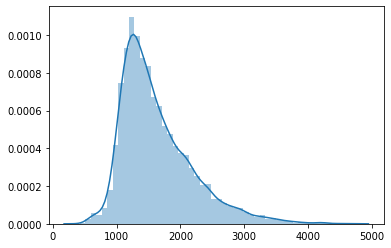

In [108]:
sns.distplot(y_pred)
plt.show()